<div style="background-color:#2E87A4 ;color:#FDFDFD;padding:20px;border:1px solid #3184BB;text-align:center;">
<p><font size="12" color="#FDFDFD" face="Lora"><i>Customer Churn Prediction</i></font> </p>
</div>

# Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [2]:
df=pd.read_csv(r"C:\Users\61491\Desktop\Inn DS\DS_excel_sheets\churn_dataset.csv",skipinitialspace=True)
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

# Data Cleaning

## Check for duplicates

In [3]:
df.duplicated().value_counts()

False    7043
dtype: int64

## Check for missing values

In [4]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
# 11 null values were observed in TotalCharges column

df[df.TotalCharges.isna()]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

## Filling the missing values

In [6]:
x=df.TotalCharges.mean()
df.TotalCharges.fillna(x,inplace=True)

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Check for Corrupted Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# no courrupted data

## Outliers

In [10]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

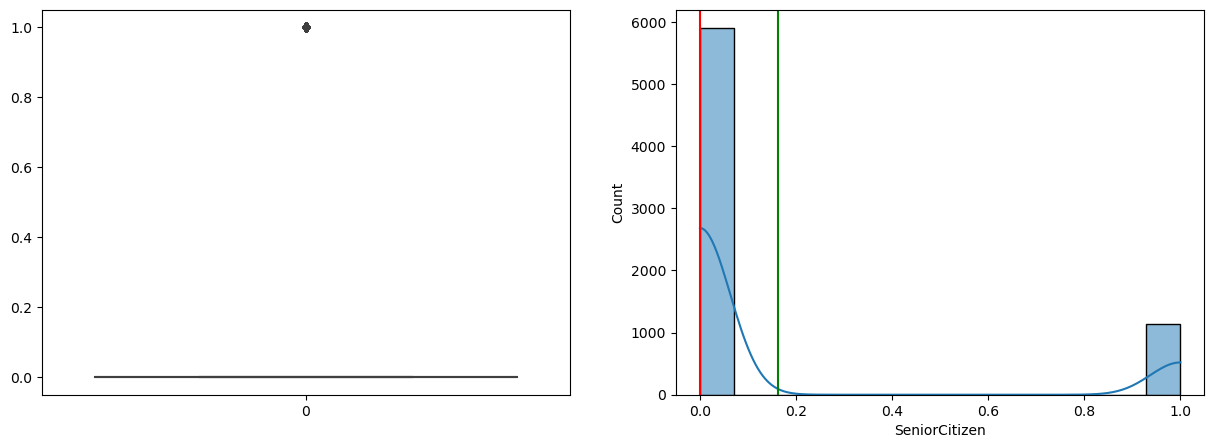

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df.SeniorCitizen)

plt.subplot(122)
sns.histplot(df.SeniorCitizen, kde = True)
plt.axvline(df.SeniorCitizen.mean(), color = 'green')
plt.axvline(df.SeniorCitizen.median(), color = 'red');

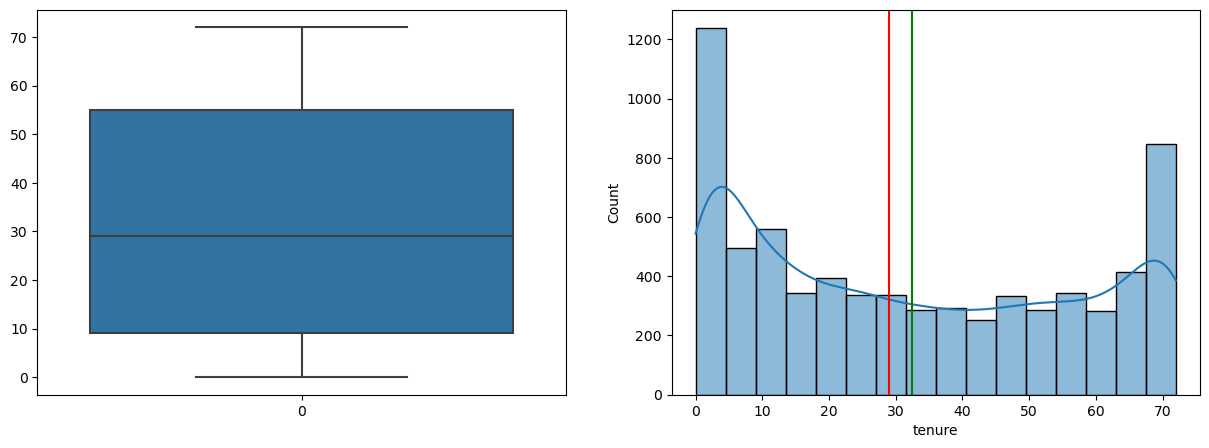

In [12]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df.tenure)

plt.subplot(122)
sns.histplot(df.tenure, kde = True)
plt.axvline(df.tenure.mean(), color = 'green')
plt.axvline(df.tenure.median(), color = 'red');

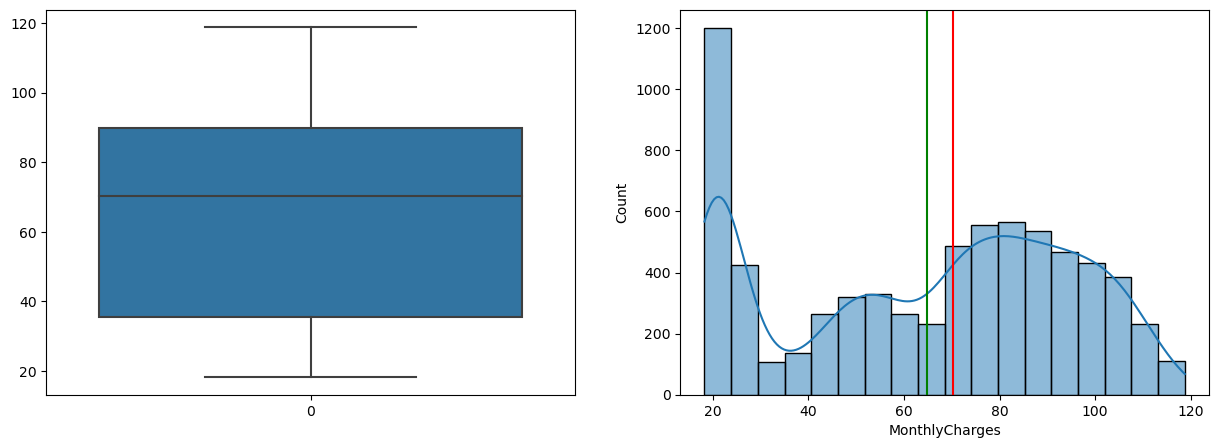

In [13]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df.MonthlyCharges)

plt.subplot(122)
sns.histplot(df.MonthlyCharges, kde = True)
plt.axvline(df.MonthlyCharges.mean(), color = 'green')
plt.axvline(df.MonthlyCharges.median(), color = 'red');

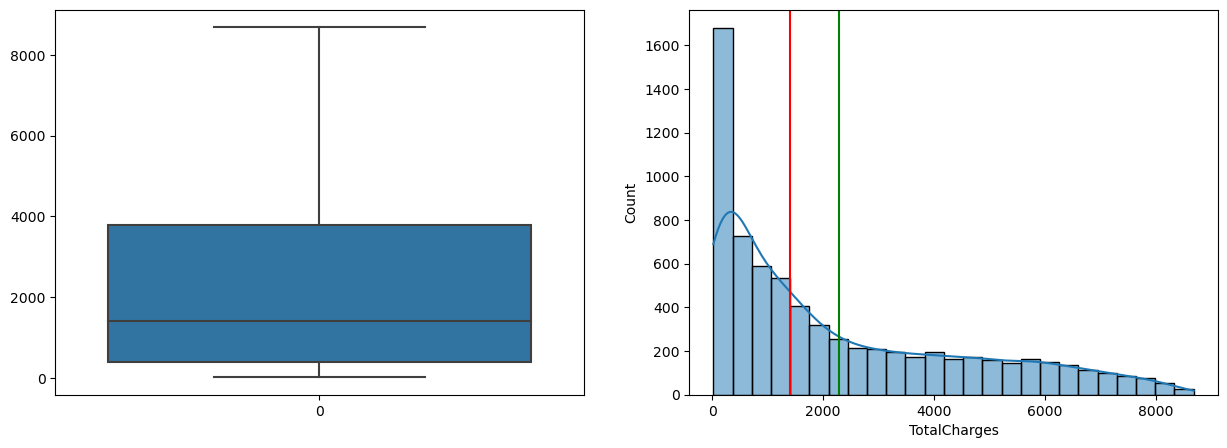

In [14]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df.TotalCharges)

plt.subplot(122)
sns.histplot(df.TotalCharges, kde = True)
plt.axvline(df.TotalCharges.mean(), color = 'green')
plt.axvline(df.TotalCharges.median(), color = 'red');

# Data Visualization

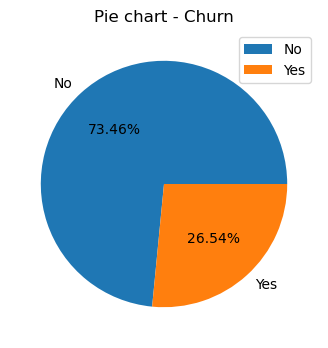

In [15]:
# Churn percentage

plt.figure(figsize=(4,4),dpi=100)
plt.pie(x=df.Churn.value_counts().values,labels=df.Churn.value_counts().index,autopct="%.2f%%")
plt.title("Pie chart - Churn")
plt.legend(loc='upper right');

**Evidently, 26.54% of the customers are observed to Churn, and this is the issue Telecomminication industry is facing.**

## Demographic Information
### Univariate Analysis

**The pie-charts below will be depicting various feautures of the customers which include SeniorCitizen, Gender, Number of dependents and Partner.**

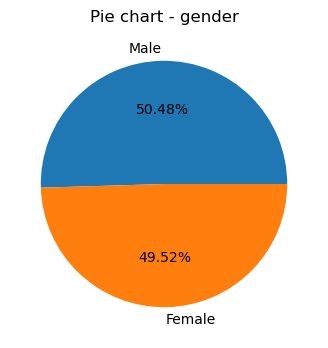

In [16]:
#gender

plt.figure(figsize=(4,4),dpi=100)
plt.pie(x=df.gender.value_counts().values,labels=df.gender.value_counts().index,autopct="%.2f%%")
plt.title("Pie chart - gender");

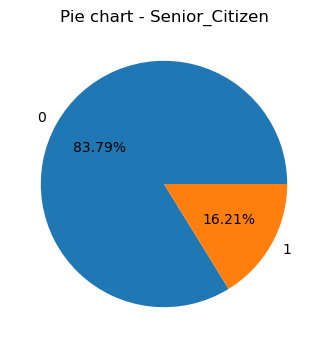

In [17]:
# Senior_Citizen

plt.figure(figsize=(4,4),dpi=100)
plt.pie(x=df.SeniorCitizen.value_counts().values,labels=df.SeniorCitizen.value_counts().index,autopct="%.2f%%")
plt.title("Pie chart - Senior_Citizen");

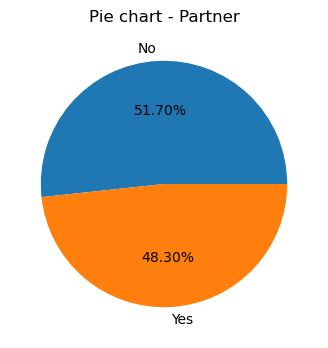

In [18]:
#Partner

plt.figure(figsize=(4,4),dpi=100)
plt.pie(x=df.Partner.value_counts().values,labels=df.Partner.value_counts().index,autopct="%.2f%%")
plt.title("Pie chart - Partner");

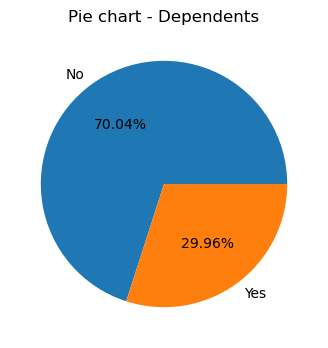

In [19]:
#Dependents

plt.figure(figsize=(4,4),dpi=100)
plt.pie(x=df.Dependents.value_counts().values,labels=df.Dependents.value_counts().index,autopct="%.2f%%")
plt.title("Pie chart - Dependents");

### Bivariate Analysis

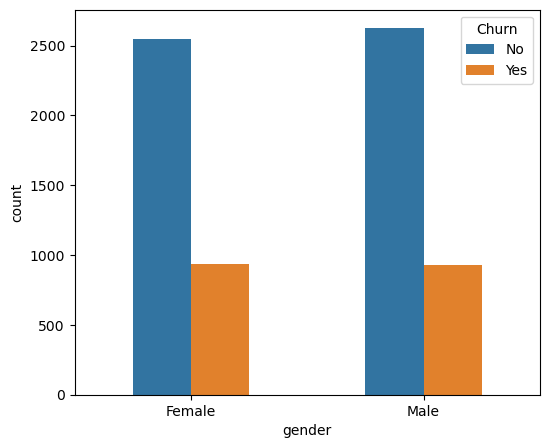

In [20]:
#gender
plt.figure(figsize=(6,5))
sns.countplot(x='gender',hue='Churn',width=0.5,data=df);

**Though results are almost same, a close observation reveals that the count of female churn is slightly greater than that of male.**

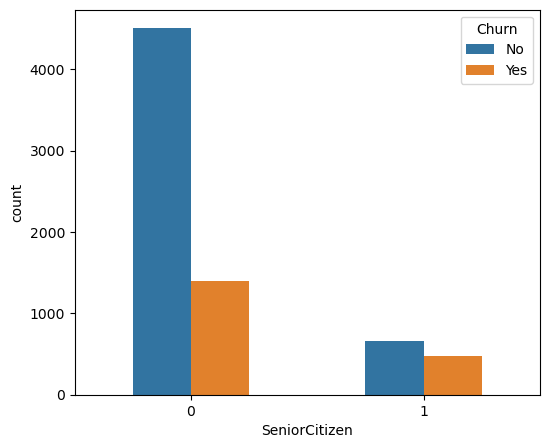

In [21]:
#SeniorCitizen
plt.figure(figsize=(6,5))
sns.countplot(x='SeniorCitizen',hue='Churn',width=0.5,data=df);

**The percentage of Senior Citizens is 16.21% in the overall data. Clearly, the churn of this age-group is very high in comparision with non-senior citizens** 

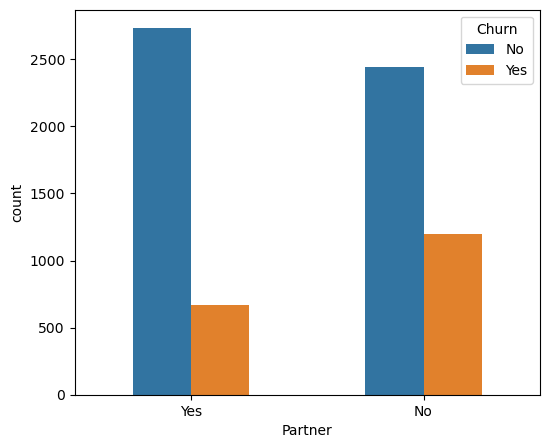

In [22]:
#SeniorCitizen
plt.figure(figsize=(6,5))
sns.countplot(x='Partner',hue='Churn',width=0.5,data=df);

**The customers with no partners are moving from one provider to other in higher numbers.**

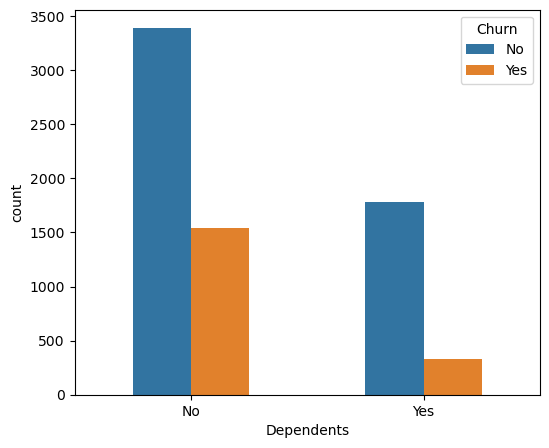

In [23]:
plt.figure(figsize=(6,5))
sns.countplot(x='Dependents',hue='Churn',width=0.5,data=df);

**More attention needs to be paid on customers with no dependents, as they are observed to churn out more.**

## Services
### Univariate Analysis

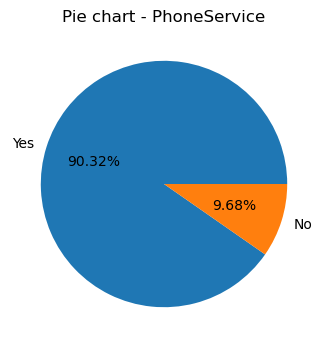

In [24]:
plt.figure(figsize=(4,4),dpi=100)
plt.pie(x=df.PhoneService.value_counts().values,labels=df.PhoneService.value_counts().index,autopct="%.2f%%")
plt.title("Pie chart - PhoneService");

**Only 9.68% of customers are not equipped with Phone Service.**

### Bivariate Analysis

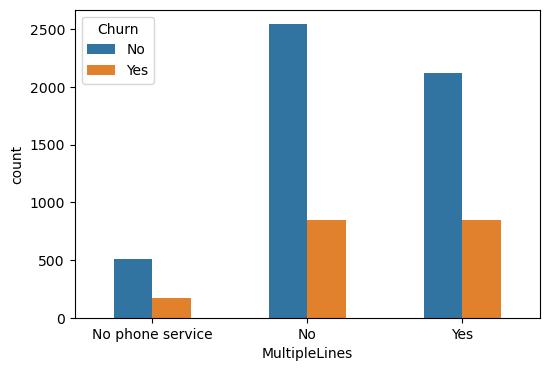

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x="MultipleLines",hue="Churn",width=0.5,data=df);

**Customers with no multiple lines are more likely to churn in comparison with those having multiple lines services.**

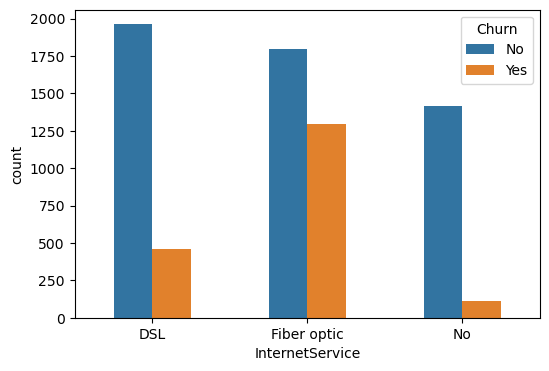

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x="InternetService",hue="Churn",width=0.5,data=df);

**A very high churn is being observed in customers using Fiber optic internet services.**

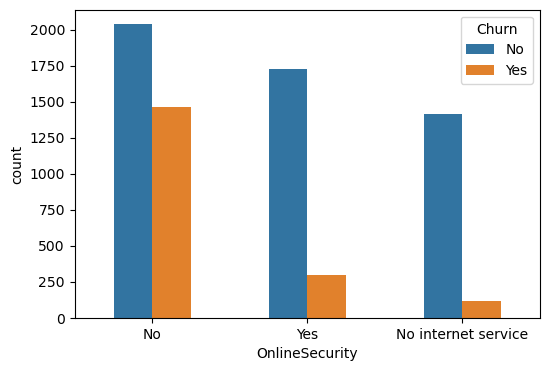

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x="OnlineSecurity",hue="Churn",width=0.5,data=df);

**Online security must be considered as one of the highest priorities since customers with no online security are moving out of the existing provider in massive numbers.**

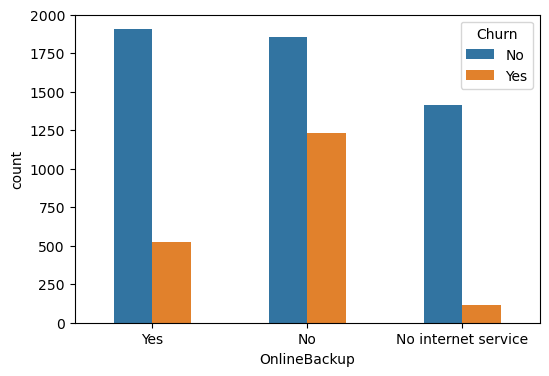

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x="OnlineBackup",hue="Churn",width=0.5,data=df);

**Service providers must be really careful with the online backup facilities, as there is a high risk of losing existing customers if these services are neglected.**

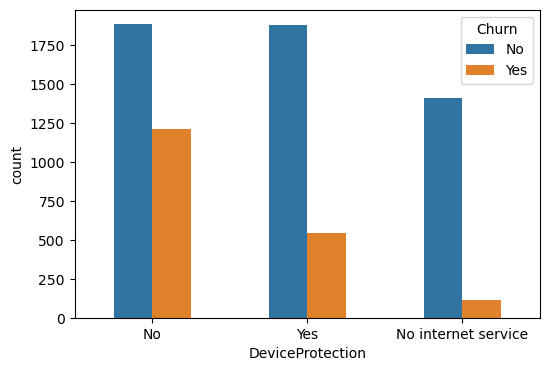

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x="DeviceProtection",hue="Churn",width=0.5,data=df);

**No Device protection direcltly means more churn of customers.**

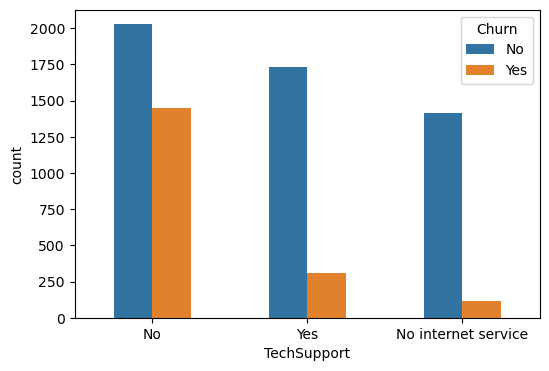

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(x="TechSupport",hue="Churn",width=0.5,data=df);

**TechSupport is highly vital for retention of customers.**

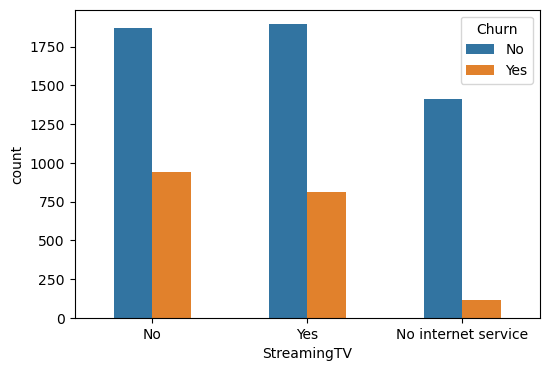

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(x="StreamingTV",hue="Churn",width=0.5,data=df);

**Customers with no Streaming TV services are churning in slightly more numbers in comparison.**

## Account Information

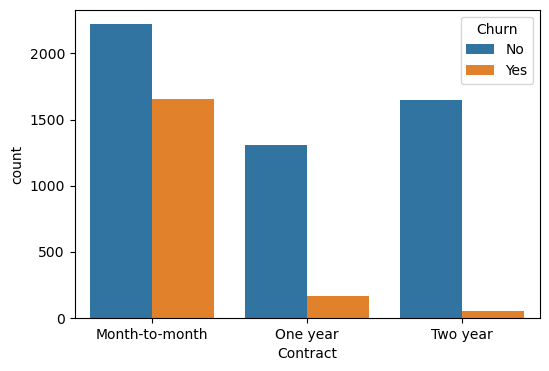

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract',hue='Churn',data=df);

**Customers with longer period contract (Two year>One year>Month-Month) are less likely to churn.**

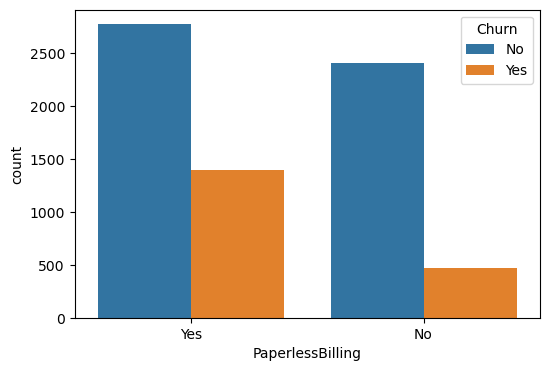

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(x='PaperlessBilling',hue='Churn',data=df);

**Customers opting for Paperless billing are churning out the most.**

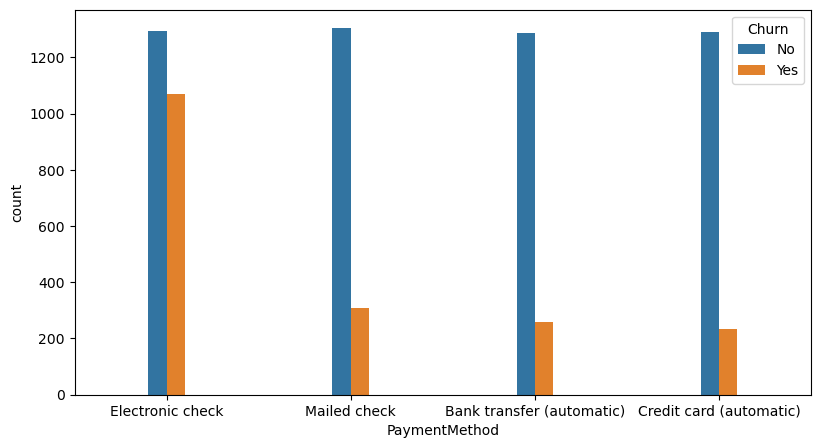

In [34]:
plt.figure(figsize=(9.5,5))
sns.countplot(x='PaymentMethod',hue='Churn',width=0.2, data=df);

**Quite evidently, customers using Electronic check payment method are observed to churn greatly.**

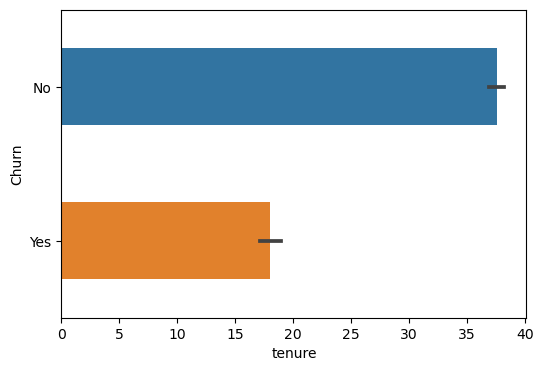

In [35]:
plt.figure(figsize=(6,4))
sns.barplot(x="tenure",y="Churn",width=0.5,data=df);

**Customers who have been there for longer periods are churning less when compared to those whose tenure is less.**

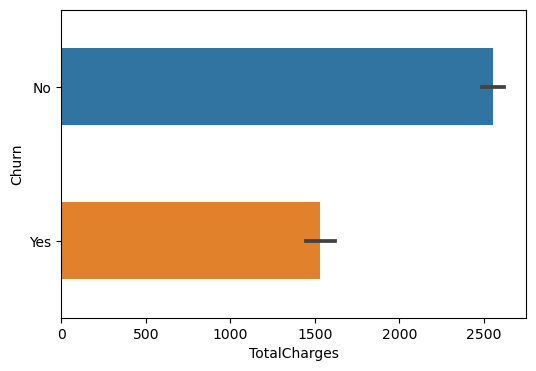

In [36]:
plt.figure(figsize=(6,4))
sns.barplot(x="TotalCharges",y="Churn",width=0.5,data=df);

### Scatter plot

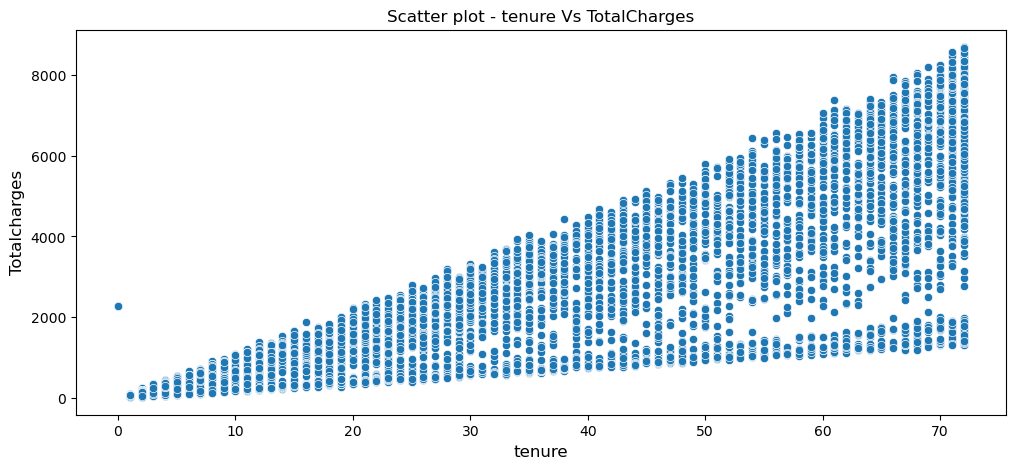

In [37]:
plt.figure(figsize=(12,5),dpi=100)
sns.scatterplot(x="tenure",y="TotalCharges",data=df)
plt.title("Scatter plot - tenure Vs TotalCharges")
plt.xlabel("tenure",fontsize=12)
plt.ylabel("Totalcharges",fontsize=12);

## Multivariate Analysis

### Pair plot

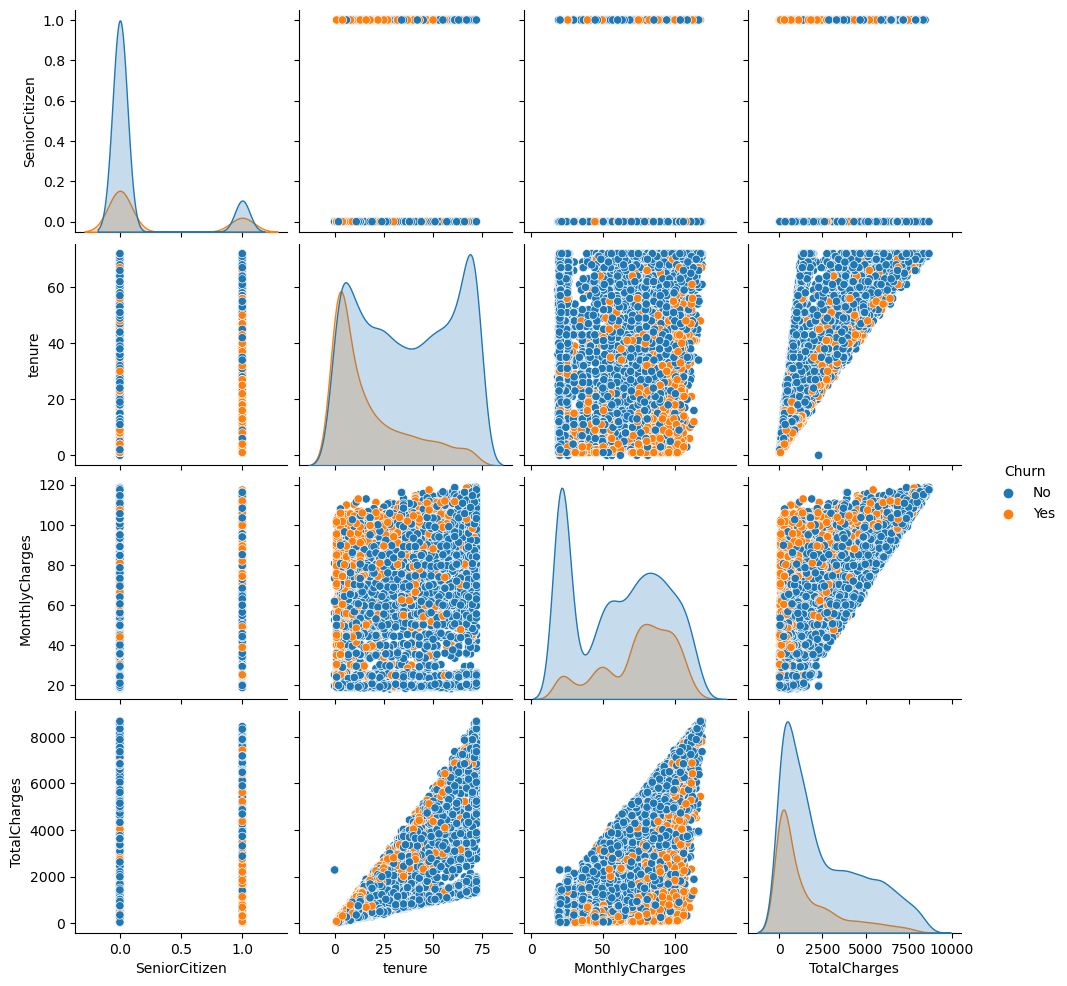

In [38]:
sns.pairplot(df, hue='Churn');

### Heatmap

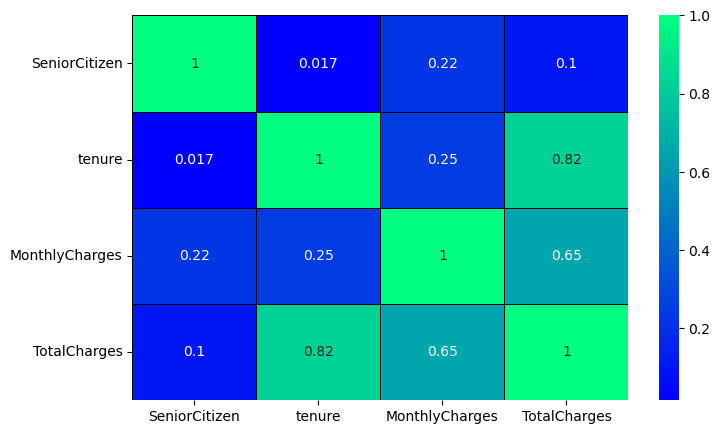

In [39]:
i=df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(i, annot=True, linewidths=0.5,cmap='winter', linecolor='black');

# Data Preparation

## a. Identify the Target Variable and Splitting the Data into Train and Test

In [40]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [41]:
import sklearn

# Identifying the inputs (X) and output (y)

y = df['Churn']
X = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

In [42]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=420)

X_train.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
4282  Female              0     Yes        Yes      52          Yes   
77    Female              0     Yes        Yes       8          Yes   
3203  Female              0     Yes         No      72          Yes   
6867    Male              0      No         No      67          Yes   
1703    Male              0      No         No      11           No   

         MultipleLines InternetService       OnlineSecurity  \
4282               Yes     Fiber optic                   No   
77                  No             DSL                  Yes   
3203               Yes             DSL                  Yes   
6867                No              No  No internet service   
1703  No phone service             DSL                   No   

             OnlineBackup     DeviceProtection          TechSupport  \
4282                   No                  Yes                   No   
77                    Yes                   No                   No   
3203                  Yes                  Yes                  Yes   
6867  No internet service  No internet service  No internet service   
1703                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies        Contract  \
4282                  Yes                  Yes        One year   
77                     No                   No  Month-to-month   
3203                  Yes                  Yes        Two year   
6867  No internet service  No internet service        Two year   
1703                   No                   No  Month-to-month   

     PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  
4282               No  Bank transfer (automatic)          101.25       5301.10  
77                 No               Mailed check           54.65        482.25  
3203               No  Bank transfer (automatic)           88.05       6520.80  
6867               No  Bank transfer (automatic)           19.95       1311.75  
1703              Yes           Electronic check           35.65        425.10

In [43]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(5282, 19) (5282,)
(1761, 19) (1761,)


## b. Separating Categorical and Numerical Columns

In [44]:
X_train.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
4282  Female              0     Yes        Yes      52          Yes   
77    Female              0     Yes        Yes       8          Yes   
3203  Female              0     Yes         No      72          Yes   
6867    Male              0      No         No      67          Yes   
1703    Male              0      No         No      11           No   

         MultipleLines InternetService       OnlineSecurity  \
4282               Yes     Fiber optic                   No   
77                  No             DSL                  Yes   
3203               Yes             DSL                  Yes   
6867                No              No  No internet service   
1703  No phone service             DSL                   No   

             OnlineBackup     DeviceProtection          TechSupport  \
4282                   No                  Yes                   No   
77                    Yes                   No                   No   
3203                  Yes                  Yes                  Yes   
6867  No internet service  No internet service  No internet service   
1703                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies        Contract  \
4282                  Yes                  Yes        One year   
77                     No                   No  Month-to-month   
3203                  Yes                  Yes        Two year   
6867  No internet service  No internet service        Two year   
1703                   No                   No  Month-to-month   

     PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  
4282               No  Bank transfer (automatic)          101.25       5301.10  
77                 No               Mailed check           54.65        482.25  
3203               No  Bank transfer (automatic)           88.05       6520.80  
6867               No  Bank transfer (automatic)           19.95       1311.75  
1703              Yes           Electronic check           35.65        425.10

In [45]:
X_train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [46]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

gender Partner Dependents PhoneService     MultipleLines  \
4282  Female     Yes        Yes          Yes               Yes   
77    Female     Yes        Yes          Yes                No   
3203  Female     Yes         No          Yes               Yes   
6867    Male      No         No          Yes                No   
1703    Male      No         No           No  No phone service   

     InternetService       OnlineSecurity         OnlineBackup  \
4282     Fiber optic                   No                   No   
77               DSL                  Yes                  Yes   
3203             DSL                  Yes                  Yes   
6867              No  No internet service  No internet service   
1703             DSL                   No                  Yes   

         DeviceProtection          TechSupport          StreamingTV  \
4282                  Yes                   No                  Yes   
77                     No                   No                   No   
3203                  Yes                  Yes                  Yes   
6867  No internet service  No internet service  No internet service   
1703                   No                  Yes                   No   

          StreamingMovies        Contract PaperlessBilling  \
4282                  Yes        One year               No   
77                     No  Month-to-month               No   
3203                  Yes        Two year               No   
6867  No internet service        Two year               No   
1703                   No  Month-to-month              Yes   

                  PaymentMethod  
4282  Bank transfer (automatic)  
77                 Mailed check  
3203  Bank transfer (automatic)  
6867  Bank transfer (automatic)  
1703           Electronic check

In [47]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges
4282              0      52          101.25       5301.10
77                0       8           54.65        482.25
3203              0      72           88.05       6520.80
6867              0      67           19.95       1311.75
1703              0      11           35.65        425.10

## c. Scaling the Numerical Features

In [48]:
X_train_num.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges
4282              0      52          101.25       5301.10
77                0       8           54.65        482.25
3203              0      72           88.05       6520.80
6867              0      67           19.95       1311.75
1703              0      11           35.65        425.10

In [49]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

SeniorCitizen    tenure  MonthlyCharges  TotalCharges
4282      -0.434861  0.794075        1.211682      1.332329
77        -0.434861 -0.996363       -0.330029     -0.798109
3203      -0.434861  1.607911        0.774974      1.871564
6867      -0.434861  1.404452       -1.478042     -0.431383
1703      -0.434861 -0.874288       -0.958624     -0.823375

In [50]:
X_train_num.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    5282.000000  5282.000000     5282.000000   5282.000000
mean        0.159031    32.485612       64.625511   2287.497568
std         0.365739    24.577318       30.229014   2262.120150
min         0.000000     0.000000       18.700000     18.800000
25%         0.000000     9.000000       35.000000    393.012500
50%         0.000000    29.000000       70.300000   1413.600000
75%         0.000000    56.000000       89.850000   3801.600000
max         1.000000    72.000000      118.750000   8684.800000

In [51]:
X_train_num_rescaled.describe()

SeniorCitizen        tenure  MonthlyCharges  TotalCharges
count   5.282000e+03  5.282000e+03    5.282000e+03  5.282000e+03
mean   -4.439211e-17  6.591555e-17   -1.674793e-16 -3.497560e-17
std     1.000095e+00  1.000095e+00    1.000095e+00  1.000095e+00
min    -4.348609e-01 -1.321897e+00   -1.519397e+00 -1.003003e+00
25%    -4.348609e-01 -9.556712e-01   -9.801284e-01 -8.375614e-01
50%    -4.348609e-01 -1.418357e-01    1.877344e-01 -3.863545e-01
75%    -4.348609e-01  9.568422e-01    8.345253e-01  6.693923e-01
max     2.299586e+00  1.607911e+00    1.790651e+00  2.828280e+00

In [52]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 4
Mean of each column: [1.59030670e-01 3.24856115e+01 6.46255112e+01 2.28749757e+03]
Std of each column: [3.65704684e-01 2.45749917e+01 3.02261523e+01 2.26190601e+03]


## d. Applying OneHotEncoding on Categorical Columns

In [53]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
4282          0.0          1.0             1.0               1.0   
77            0.0          1.0             1.0               1.0   
3203          0.0          1.0             0.0               1.0   
6867          1.0          0.0             0.0               1.0   
1703          1.0          0.0             0.0               0.0   

      MultipleLines_No phone service  MultipleLines_Yes  \
4282                             0.0                1.0   
77                               0.0                0.0   
3203                             0.0                1.0   
6867                             0.0                0.0   
1703                             1.0                0.0   

      InternetService_Fiber optic  InternetService_No  \
4282                          1.0                 0.0   
77                            0.0                 0.0   
3203                          0.0                 0.0   
6867                          0.0                 1.0   
1703                          0.0                 0.0   

      OnlineSecurity_No internet service  OnlineSecurity_Yes  ...  \
4282                                 0.0                 0.0  ...   
77                                   0.0                 1.0  ...   
3203                                 0.0                 1.0  ...   
6867                                 1.0                 0.0  ...   
1703                                 0.0                 0.0  ...   

      StreamingTV_No internet service  StreamingTV_Yes  \
4282                              0.0              1.0   
77                                0.0              0.0   
3203                              0.0              1.0   
6867                              1.0              0.0   
1703                              0.0              0.0   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
4282                                  0.0                  1.0   
77                                    0.0                  0.0   
3203                                  0.0                  1.0   
6867                                  1.0                  0.0   
1703                                  0.0                  0.0   

      Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
4282                1.0                0.0                   0.0   
77                  0.0                0.0                   0.0   
3203                0.0                1.0                   0.0   
6867                0.0                1.0                   0.0   
1703                0.0                0.0                   1.0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
4282                                    0.0                             0.0   
77                                      0.0                             0.0   
3203                                    0.0                             0.0   
6867                                    0.0                             0.0   
1703                                    0.0                             1.0   

      PaymentMethod_Mailed check  
4282                         0.0  
77                           1.0  
3203                         0.0  
6867                         0.0  
1703                         0.0  

[5 rows x 26 columns]

## e. Concatinating the Encoded Categorical Features and Rescaled Numerical Features

In [54]:

X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)

X_train_transformed.head()

SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
4282      -0.434861  0.794075        1.211682      1.332329          0.0   
77        -0.434861 -0.996363       -0.330029     -0.798109          0.0   
3203      -0.434861  1.607911        0.774974      1.871564          0.0   
6867      -0.434861  1.404452       -1.478042     -0.431383          1.0   
1703      -0.434861 -0.874288       -0.958624     -0.823375          1.0   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
4282          1.0             1.0               1.0   
77            1.0             1.0               1.0   
3203          1.0             0.0               1.0   
6867          0.0             0.0               1.0   
1703          0.0             0.0               0.0   

      MultipleLines_No phone service  MultipleLines_Yes  ...  \
4282                             0.0                1.0  ...   
77                               0.0                0.0  ...   
3203                             0.0                1.0  ...   
6867                             0.0                0.0  ...   
1703                             1.0                0.0  ...   

      StreamingTV_No internet service  StreamingTV_Yes  \
4282                              0.0              1.0   
77                                0.0              0.0   
3203                              0.0              1.0   
6867                              1.0              0.0   
1703                              0.0              0.0   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
4282                                  0.0                  1.0   
77                                    0.0                  0.0   
3203                                  0.0                  1.0   
6867                                  1.0                  0.0   
1703                                  0.0                  0.0   

      Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
4282                1.0                0.0                   0.0   
77                  0.0                0.0                   0.0   
3203                0.0                1.0                   0.0   
6867                0.0                1.0                   0.0   
1703                0.0                0.0                   1.0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
4282                                    0.0                             0.0   
77                                      0.0                             0.0   
3203                                    0.0                             0.0   
6867                                    0.0                             0.0   
1703                                    0.0                             1.0   

      PaymentMethod_Mailed check  
4282                         0.0  
77                           1.0  
3203                         0.0  
6867                         0.0  
1703                         0.0  

[5 rows x 30 columns]

## f. Preparing Test Data

In [55]:
X_test.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
5243    Male              0      No         No      19          Yes   
3122    Male              1     Yes        Yes      68          Yes   
4447    Male              0     Yes         No      68          Yes   
5029  Female              0     Yes         No       7          Yes   
385     Male              1     Yes         No      11          Yes   

     MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
5243            No     Fiber optic                   No                   No   
3122            No              No  No internet service  No internet service   
4447           Yes     Fiber optic                  Yes                  Yes   
5029            No             DSL                  Yes                   No   
385             No              No  No internet service  No internet service   

         DeviceProtection          TechSupport          StreamingTV  \
5243                   No                  Yes                   No   
3122  No internet service  No internet service  No internet service   
4447                   No                  Yes                  Yes   
5029                   No                   No                   No   
385   No internet service  No internet service  No internet service   

          StreamingMovies        Contract PaperlessBilling  \
5243                  Yes        One year              Yes   
3122  No internet service        One year               No   
4447                  Yes  Month-to-month              Yes   
5029                   No  Month-to-month              Yes   
385   No internet service  Month-to-month               No   

                  PaymentMethod  MonthlyCharges  TotalCharges  
5243    Credit card (automatic)           87.70       1725.95  
3122  Bank transfer (automatic)           19.50       1193.55  
4447           Electronic check          107.70       7320.90  
5029  Bank transfer (automatic)           50.30        355.10  
385                Mailed check           19.95        214.75

In [56]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 5243 to 5397
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1761 non-null   object 
 1   SeniorCitizen     1761 non-null   int64  
 2   Partner           1761 non-null   object 
 3   Dependents        1761 non-null   object 
 4   tenure            1761 non-null   int64  
 5   PhoneService      1761 non-null   object 
 6   MultipleLines     1761 non-null   object 
 7   InternetService   1761 non-null   object 
 8   OnlineSecurity    1761 non-null   object 
 9   OnlineBackup      1761 non-null   object 
 10  DeviceProtection  1761 non-null   object 
 11  TechSupport       1761 non-null   object 
 12  StreamingTV       1761 non-null   object 
 13  StreamingMovies   1761 non-null   object 
 14  Contract          1761 non-null   object 
 15  PaperlessBilling  1761 non-null   object 
 16  PaymentMethod     1761 non-null   objec

In [57]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

gender Partner Dependents PhoneService MultipleLines InternetService  \
5243    Male      No         No          Yes            No     Fiber optic   
3122    Male     Yes        Yes          Yes            No              No   
4447    Male     Yes         No          Yes           Yes     Fiber optic   
5029  Female     Yes         No          Yes            No             DSL   
385     Male     Yes         No          Yes            No              No   

           OnlineSecurity         OnlineBackup     DeviceProtection  \
5243                   No                   No                   No   
3122  No internet service  No internet service  No internet service   
4447                  Yes                  Yes                   No   
5029                  Yes                   No                   No   
385   No internet service  No internet service  No internet service   

              TechSupport          StreamingTV      StreamingMovies  \
5243                  Yes                   No                  Yes   
3122  No internet service  No internet service  No internet service   
4447                  Yes                  Yes                  Yes   
5029                   No                   No                   No   
385   No internet service  No internet service  No internet service   

            Contract PaperlessBilling              PaymentMethod  
5243        One year              Yes    Credit card (automatic)  
3122        One year               No  Bank transfer (automatic)  
4447  Month-to-month              Yes           Electronic check  
5029  Month-to-month              Yes  Bank transfer (automatic)  
385   Month-to-month               No               Mailed check

In [58]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges
5243              0      19           87.70       1725.95
3122              1      68           19.50       1193.55
4447              0      68          107.70       7320.90
5029              0       7           50.30        355.10
385               1      11           19.95        214.75

In [59]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

SeniorCitizen    tenure  MonthlyCharges  TotalCharges
5243      -0.434861 -0.548753        0.763395     -0.248263
3122       2.299586  1.445143       -1.492929     -0.483640
4447      -0.434861  1.445143        1.425074      2.225292
5029      -0.434861 -1.037055       -0.473944     -0.854323
385        2.299586 -0.874288       -1.478042     -0.916372

In [60]:
X_test_cat_ohe = pd.DataFrame(index = X_test_cat.index)

X_test_cat_ohe.head()

Empty DataFrame
Columns: []
Index: [5243, 3122, 4447, 5029, 385]

In [61]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
5243          1.0          0.0             0.0               1.0   
3122          1.0          1.0             1.0               1.0   
4447          1.0          1.0             0.0               1.0   
5029          0.0          1.0             0.0               1.0   
385           1.0          1.0             0.0               1.0   

      MultipleLines_No phone service  MultipleLines_Yes  \
5243                             0.0                0.0   
3122                             0.0                0.0   
4447                             0.0                1.0   
5029                             0.0                0.0   
385                              0.0                0.0   

      InternetService_Fiber optic  InternetService_No  \
5243                          1.0                 0.0   
3122                          0.0                 1.0   
4447                          1.0                 0.0   
5029                          0.0                 0.0   
385                           0.0                 1.0   

      OnlineSecurity_No internet service  OnlineSecurity_Yes  ...  \
5243                                 0.0                 0.0  ...   
3122                                 1.0                 0.0  ...   
4447                                 0.0                 1.0  ...   
5029                                 0.0                 1.0  ...   
385                                  1.0                 0.0  ...   

      StreamingTV_No internet service  StreamingTV_Yes  \
5243                              0.0              0.0   
3122                              1.0              0.0   
4447                              0.0              1.0   
5029                              0.0              0.0   
385                               1.0              0.0   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
5243                                  0.0                  1.0   
3122                                  1.0                  0.0   
4447                                  0.0                  1.0   
5029                                  0.0                  0.0   
385                                   1.0                  0.0   

      Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
5243                1.0                0.0                   1.0   
3122                1.0                0.0                   0.0   
4447                0.0                0.0                   1.0   
5029                0.0                0.0                   1.0   
385                 0.0                0.0                   0.0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
5243                                    1.0                             0.0   
3122                                    0.0                             0.0   
4447                                    0.0                             1.0   
5029                                    0.0                             0.0   
385                                     0.0                             0.0   

      PaymentMethod_Mailed check  
5243                         0.0  
3122                         0.0  
4447                         0.0  
5029                         0.0  
385                          1.0  

[5 rows x 26 columns]

In [62]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
5243      -0.434861 -0.548753        0.763395     -0.248263          1.0   
3122       2.299586  1.445143       -1.492929     -0.483640          1.0   
4447      -0.434861  1.445143        1.425074      2.225292          1.0   
5029      -0.434861 -1.037055       -0.473944     -0.854323          0.0   
385        2.299586 -0.874288       -1.478042     -0.916372          1.0   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
5243          0.0             0.0               1.0   
3122          1.0             1.0               1.0   
4447          1.0             0.0               1.0   
5029          1.0             0.0               1.0   
385           1.0             0.0               1.0   

      MultipleLines_No phone service  MultipleLines_Yes  ...  \
5243                             0.0                0.0  ...   
3122                             0.0                0.0  ...   
4447                             0.0                1.0  ...   
5029                             0.0                0.0  ...   
385                              0.0                0.0  ...   

      StreamingTV_No internet service  StreamingTV_Yes  \
5243                              0.0              0.0   
3122                              1.0              0.0   
4447                              0.0              1.0   
5029                              0.0              0.0   
385                               1.0              0.0   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
5243                                  0.0                  1.0   
3122                                  1.0                  0.0   
4447                                  0.0                  1.0   
5029                                  0.0                  0.0   
385                                   1.0                  0.0   

      Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
5243                1.0                0.0                   1.0   
3122                1.0                0.0                   0.0   
4447                0.0                0.0                   1.0   
5029                0.0                0.0                   1.0   
385                 0.0                0.0                   0.0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
5243                                    1.0                             0.0   
3122                                    0.0                             0.0   
4447                                    0.0                             1.0   
5029                                    0.0                             0.0   
385                                     0.0                             0.0   

      PaymentMethod_Mailed check  
5243                         0.0  
3122                         0.0  
4447                         0.0  
5029                         0.0  
385                          1.0  

[5 rows x 30 columns]

# Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

LogisticRegression()

## Prediction 

In [64]:
y_test_pred = classifier.predict(X_test_transformed)

## Evaluation

In [65]:
# calculate accuracy of class predictions
from sklearn import metrics


logistic_regression_accuracy= metrics.accuracy_score(y_test, y_test_pred)
logistic_regression_accuracy

0.8097671777399205

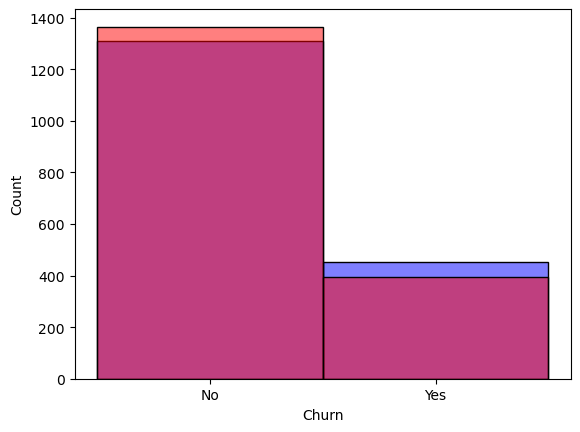

In [66]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

## KNN Classifier

In [67]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

KNN_Classifier_accuracy=metrics.accuracy_score(y_test, y_test_pred)
KNN_Classifier_accuracy

KNeighborsClassifier()

0.7654741624077229

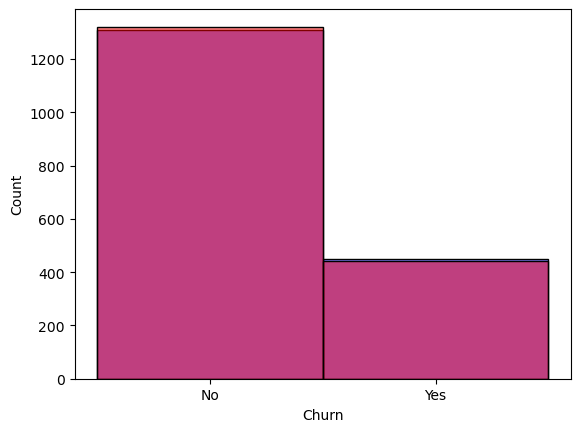

In [68]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

## DT Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

DT_Classifier_accuracy=metrics.accuracy_score(y_test, y_test_pred)
DT_Classifier_accuracy

DecisionTreeClassifier()

0.7353776263486655

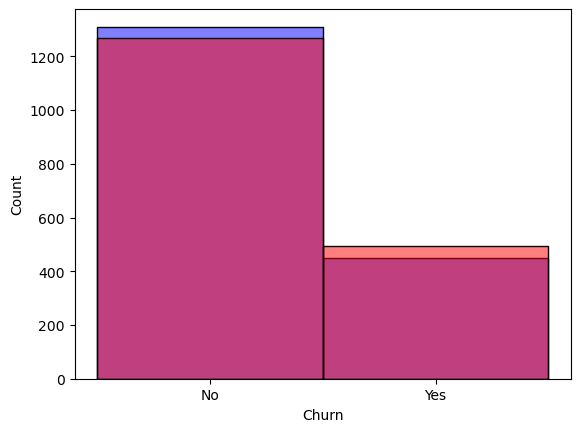

In [70]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

##  Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

Random_forest_Classifier_accuracy=metrics.accuracy_score(y_test, y_test_pred)
Random_forest_Classifier_accuracy

RandomForestClassifier()

0.8006814310051107

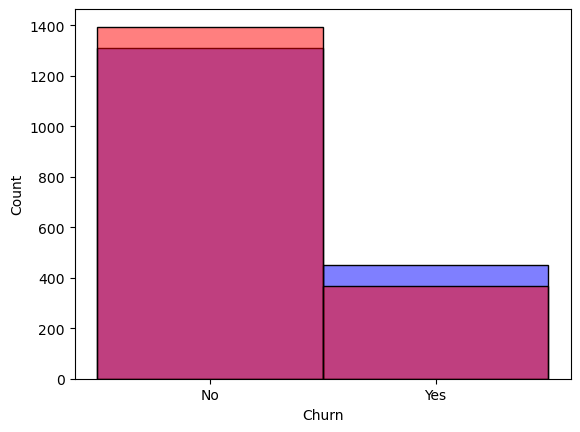

In [72]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

## Gradient Boosting Classifier

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

Gradient_Boosting_Classifier_accuracy=metrics.accuracy_score(y_test, y_test_pred)
Gradient_Boosting_Classifier_accuracy

GradientBoostingClassifier()

0.8131743327654741

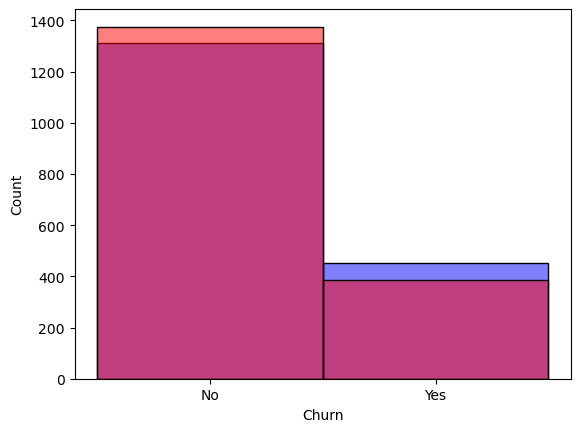

In [74]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

## ADA Boost Classifier

In [75]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

ADA_Boost_Classifier_accuracy=metrics.accuracy_score(y_test, y_test_pred)
ADA_Boost_Classifier_accuracy

AdaBoostClassifier()

0.8131743327654741

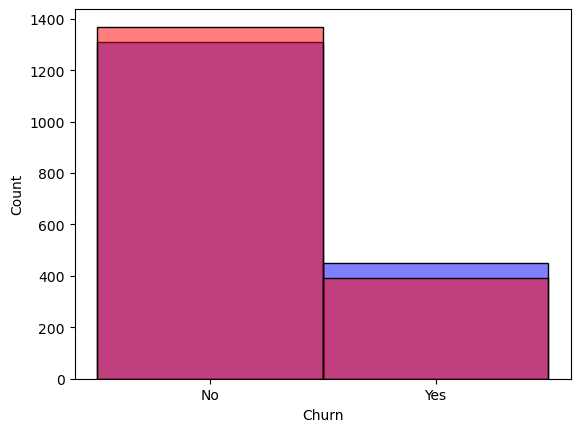

In [76]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [77]:
Results = pd.DataFrame({"Algorithm": ["GradientBoostingClassifier", "AdaBoostClassifier","LogisticRegression",
                                      "RandomForestClassifier","KNeighborsClassifier", 
                                      "DecisionTreeClassifier"],
                                 
           "Accuracy": [Gradient_Boosting_Classifier_accuracy,ADA_Boost_Classifier_accuracy, logistic_regression_accuracy, 
                                   Random_forest_Classifier_accuracy,KNN_Classifier_accuracy,DT_Classifier_accuracy]})
Results

Algorithm  Accuracy
0  GradientBoostingClassifier  0.813174
1          AdaBoostClassifier  0.813174
2          LogisticRegression  0.809767
3      RandomForestClassifier  0.800681
4        KNeighborsClassifier  0.765474
5      DecisionTreeClassifier  0.735378

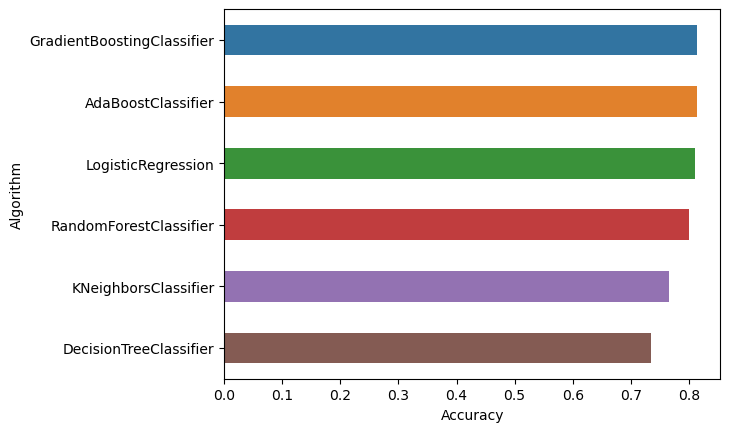

In [78]:
sns.barplot(y=Results.Algorithm,x=Results.Accuracy,width=0.5);

## Observation
Maximum accuracy found was 81.31%. This accuracy was attained using Gradient Boosting Classifier and ADA Boost Classifier. Hence, **GradientBoostingClassifier** and**ADA Boost Classifier** are the best algorithms to solve the problem.